In [28]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes #1
from sklearn.model_selection import train_test_split #5
import matplotlib.pyplot as plt #6,11
from sklearn.linear_model import LinearRegression #7
from sklearn.metrics import mean_squared_error #12
from sklearn.metrics import r2_score #14


In [8]:
#1 Load the diabetes dataset
diabetes_X, diabetes_y = load_diabetes(return_X_y=True, as_frame=True)

In [9]:
#2 Have a look at the X feature matrix
diabetes_X.head(6)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041176,-0.096346


In [10]:
#3 Have a look at the y feature matrix
diabetes_y.head(6)

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
5     97.0
Name: target, dtype: float64

In [11]:
#4 Use only the BMI feature
diabetes_X = diabetes_X["bmi"].values.reshape(-1, 1) #diabetes_X.bmi returns pandas series #not acceptable by sckitlearn.reg

In [12]:
#5 Split 80:20
diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test = train_test_split(diabetes_X,
                                                                                        diabetes_y,
                                                                                        test_size=0.2,
                                                                                        random_state=1500)

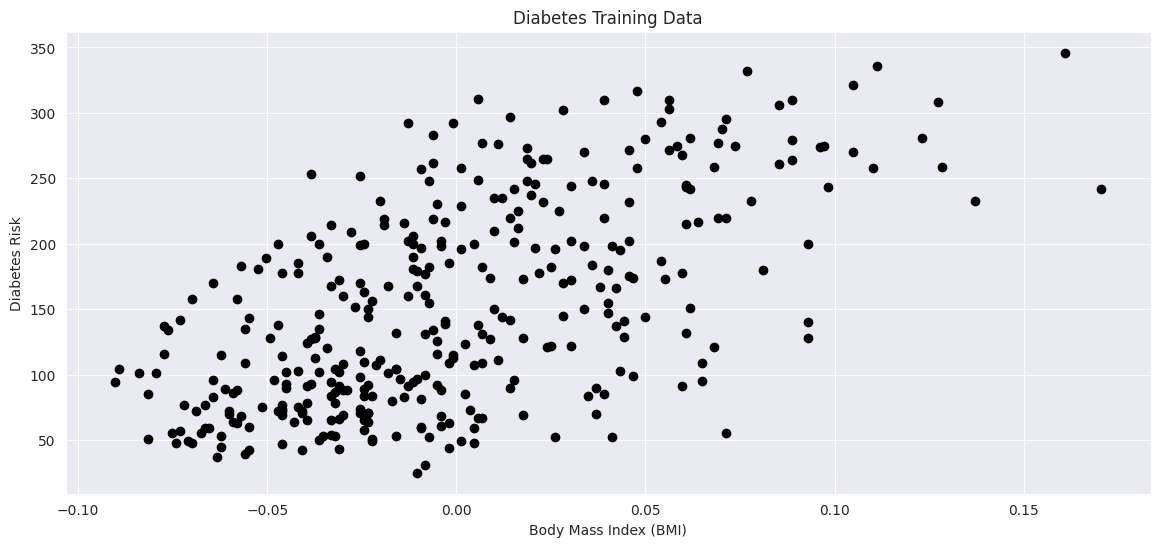

In [14]:
#6 Visualize the results
plt.rcParams['figure.figsize'] = [14, 6]

fig, ax = plt.subplots(1, 1)

ax.scatter(diabetes_X_train, diabetes_y_train, color='black')
ax.set_title('Diabetes Training Data')
ax.set_xlabel('Body Mass Index (BMI)')
ax.set_ylabel('Diabetes Risk')
plt.show();

In [16]:
#7 Create linear regression object
regr = LinearRegression(fit_intercept=True) #fit_intercept=True is the default value
print(regr)

LinearRegression()


In [17]:
#8 Train the model using the training set
regr.fit(diabetes_X_train, diabetes_y_train)  

LinearRegression()

In [21]:
#9 Calcualte theta0
print("theta0 =",regr.intercept_, "/ thate1 =",regr.coef_)

theta0 = 153.02305760636776 / thate1 = [992.83569582]


In [22]:
#10 Make predictions on the training set
diabetes_y_train_pred = regr.predict(diabetes_X_train)

# Generate predictions on the new patients
diabetes_y_test_pred = regr.predict(diabetes_X_test)

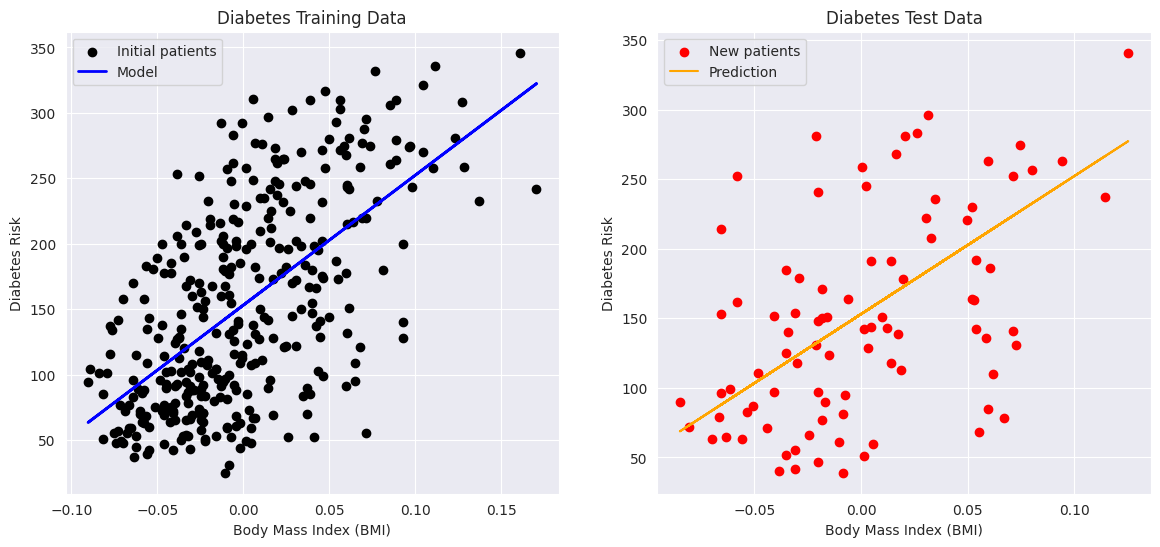

In [23]:
#11 Visualize the results
plt.rcParams['figure.figsize'] = [14, 6]

fig, (ax1, ax2) = plt.subplots(1, 2)

#left plot
ax1.scatter(diabetes_X_train, diabetes_y_train, color='black')
ax1.plot(diabetes_X_train, diabetes_y_train_pred, color='blue', linewidth=2)
ax1.set_title('Diabetes Training Data')
ax1.set_xlabel('Body Mass Index (BMI)')
ax1.set_ylabel('Diabetes Risk')
ax1.legend(['Initial patients', 'Model'])

#right plot
ax2.scatter(diabetes_X_test, diabetes_y_test, color='red')
ax2.plot(diabetes_X_test, diabetes_y_test_pred, color='orange')
#ax2.plot(diabetes_X_train, diabetes_y_train_pred, color='blue', linewidth=2)
ax2.set_title('Diabetes Test Data')
ax2.set_xlabel('Body Mass Index (BMI)')
ax2.set_ylabel('Diabetes Risk')
ax2.legend(['New patients','Prediction'])
plt.show();

In [26]:
#12 Evaluate the mse on training and test data

print('Training set mean squared error: %.2f'
      % mean_squared_error(diabetes_y_train, diabetes_y_train_pred)) # %: percent operator  format a string using a given set of variables, enclosed in a tuple, following the operator. #like sprintf in C:returns a formated string
print('Test set mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_test_pred))

Training set mean squared error: 3822.55
Test set mean squared error: 4184.89


In [27]:
#13 Evaluate r2 through score method

print('Training r2: %.2f' % regr.score(diabetes_X_train,diabetes_y_train))

print('Test r2: %.2f' % regr.score(diabetes_X_test,diabetes_y_test))  

Training r2: 0.37
Test r2: 0.22


In [30]:
#14 Evalueate r2 through r2_score function

print('Train R2: %.2f' % r2_score(diabetes_y_train, diabetes_y_train_pred))

print('Test R2: %.2f'  % r2_score(diabetes_y_test, diabetes_y_test_pred))    

# R score is between 0 <= R <= 1

Train R2: 0.37
Test R2: 0.22
